# Machine Learning for Regression
---

Notes based on [Machine Learning Boookcamp by Alexey Grigorev](https://www.amazon.in/Machine-Learning-Bookcamp-portfolio-real-life/dp/1617296813)

![Linear Regression](../img/lregression.jpg)

# Import Libraries
- `seaborn`: Makes using matplotlib easier
- `%matplotlib inline`: Enables the rendering of Matplotlib plots directly below code cells. When you execute code that generates Matplotlib plots, the plots are displayed inline within the notebook, rather than in a separate window or output cell

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Download the dataset
Dataset Location: https://www.kaggle.com/datasets/CooperUnion/cardataset

In [3]:
# Import the dataset as a Pandas DataFrame
df = pd.read_csv('./datasets/cardataset.csv')

# Exploratory Data Analysis
Explore the dataset to understand the following:
- Distribution of the target variable (car price)
- Features in this dataset
- Distribution of values in these features
- Quality of the data
- Missing values

In [4]:
# Check the number of rows in our DataFrame
len(df)

11914

In [5]:
# View the first 5 rows of our DataFrame
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We can see inconsistencies in the dataset:
- Sometimes column names have spaces, sometimes have underscores
- Feature values are sometimes capitalized, some are short strings with spaces.
Action: Replace spaces with underscores, and lowercase all letters

In [6]:
print(df.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


In [7]:
# df.columns will return the column names in the DataFrame
# Lowercase the column names, replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ','_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
# Select columns with string values: lowercase the values, replace spaces with underscores
# df.dtypes will return a Pandas Series with the data type of each column
string_columns = list(df.dtypes[df.dtypes=='object'].index)
print(string_columns)

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [10]:
for column in string_columns:
    df[column] = df[column].str.lower().str.replace(' ','_')

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Target Variable (car price) analysis
`msrp` column is the target variable, $y$, in the DataFrame

In [12]:
# Draw a histogram to how the target variable is speard out

<Axes: xlabel='msrp', ylabel='Count'>

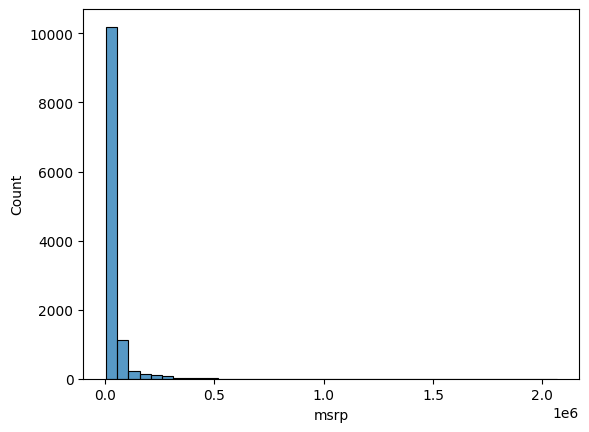

In [13]:
sns.histplot(df['msrp'],bins=40)

We see the distribution has a very long tail of few cars that have a very high price. This is a **Long Tail Distribution**, where we have many items that have a low price and very few expensive ones.

We can zoom in and focus on cars that cost less than $100,000:

<Axes: xlabel='msrp', ylabel='Count'>

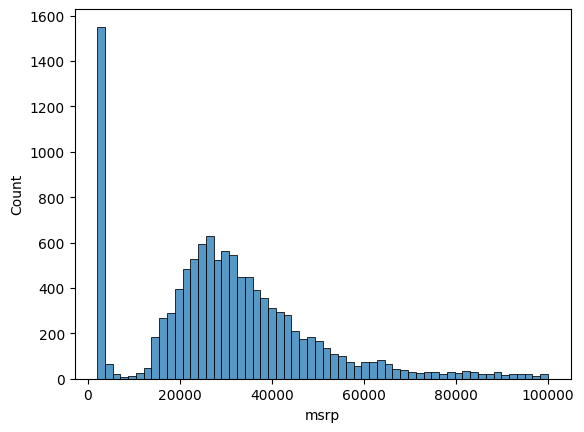

In [14]:
sns.histplot(df.msrp[df.msrp<100000])

### Log Transformation


Log Transformation is a technique to reduce skewness (our data above is right skewed) in a distribution and make it more symmetric. We will apply Log Transformation to the target variable, `msrp`:

In [15]:
log_price = np.log1p(df['msrp'])

<Axes: xlabel='msrp', ylabel='Count'>

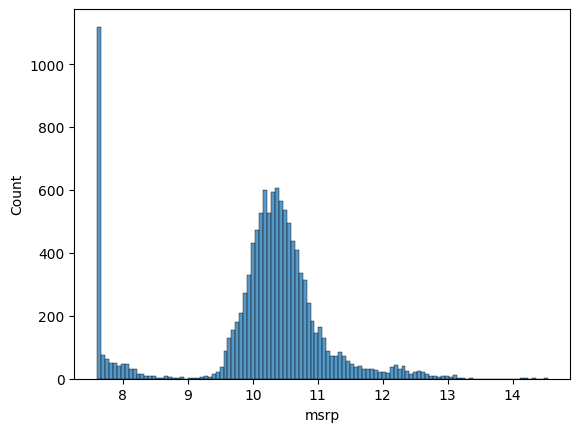

In [16]:
sns.histplot(log_price)

We can see that Log Transformation has removed the long tail.

### Check for missing values

In [17]:
# use Pandas to check for missing values:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We see that there are five columns `engine_fuel_type, engine_hp, engine_cylinders, number_of_doors, market_category` that have missing values. Our target variable, `msrp` does not have any missing values, which is good. We will handle missing data later.

## Set up Validation Framework

Validation Framework ensures that the model we train is good, and can generalize unseen data, i.e. can be applied to new, unseen data. We will split our dataset as listed below:
- 20% of dataset for **validation**
- 20% of dataset for **testing**
- 60% of dataset for **training**

In [18]:
# Shuffle the dataset
n = len(df)
n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

# Split the dataset
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled[n_train+n_val:].copy()

Apply Log Transformation to the target variable `msrp`, of the 3 datasets

In [19]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_val.msrp.values)

Once we get the predictions, we will need to **undo** the log transformation using $\Large e^{predicton+1}$, where $e$ is Euler's constant.

To avoid accidentally using the target variable, we will remove it from our dataset

In [20]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

We are now ready to train our model.

## Linear Regression

A supervised Machine Learning model has the following form:
$$\LARGE y \approx g(X)$$
- $g()$ is our Linear Regression model
- $X$ is a **Matrix**, where each row is an observation of features
- $y$ is a **Vector** of values that we want to predict (with log transformation applied)
- $(x_i,y_i)$ will represent the $i^{th}$ observation
- If we have $n$ features, then $x_i = (x_{i1},x_{i2},x_{i3},\dots,x_{in})$ will be a **feature vector** with $n$ components.
- We want the **prediction** $y$ to be as close as possible to the **actual value**, $y_i$

![Supevised ML Model](../img/matvec.jpg)

For our Linear Regression model, let's pick the 3 numerical features, and ignore the rest for now: `engine_hp,city-mpg, popularity`

$\Large g(x_i)$ has the following form: $\Large g(x_i) = w_0 + x_{i1}w_1 + x_{i2}w_2 + x_{i3}w3 + \dots + x_{in}w_n$, where:
- $w_0, w_1, w_2, \dots$ are the **model parameters** that define how they should combine with the features, so that predictions are as close as possible to actual values.
- $w_0$ is the **bias term**: this is what we would predict if we do not know anything about the car.
- $w_1,w_2,w_3,\dots$ are the **weights** of each feature, $x_{i1},x_{i2},x_{i3},\dots$. The model learns these weights during training.

We can also use the below notation for $g(x_i)$:

$\Large g(x_i) = w_0 + x_{i1}w_1 + x_{i2}w_2 + x_{i3}w3 + \dots + x_{in}w_n = w_0 + \sum_{j=1}^nx_{ij}w_j = w_0 + x_i^Tw$

Here, $x_i^Tw$ is the **Dot Product** between the feature and weight vectors. Therefore we can updated our Linear Regression equation as below:

$\Large g(x_i) = w_0 + x_i^Tw$


To make the equation shorter, we can convert the weight vector into one $(n+1)$ dimensional vectpr by pre-pending the bias term, $w_0$:

$w = (w_0,w_1,w_2,w_3,\dots,w_n)$

Since $w$ is now a $(n+1)$ dimensional vector, we also need to adjust the feature vector from $n$ to $(n+1)$ dimensions, and we can do so by pre-pending a dummy feature with a value of $1$: $x_i = (1,x_{i1},x_{i2},x_{i3},\dots,x_{in})$. Our new equation now becomes:

$\Large g(x_i) = x_i^Tw$, 

where both $x_i,w$ are $(n+1)$ dimensional vectors.

Therefore, when we define our Linear Regression function, the pseudo-code will look as shown below: the function will take the feature vector as input, and return the predicted value for the specified observation:
```py
def linear_regression(xi):
    #adding the dummy feature tp make xi n+1 dimensional
    xi = 1 + xi 
    return dot(xi,w)
```
where $xi,w$ are NumPy arrays

To summarize, below is how the Fetaure Matrix looks, where each column is a feature
![Feature Matrix](./img/featmat.jpg)

Therefore, when we define our Linear Regression pseudo-code will look as shown below:
```py
predictions = []
for xi in X
    pred = dot(xi,w)
    predictions.append(pred)
```
where $xi$ is a **Matrix** and $w$ is a **Vector**, and the result is an array of predictions for each row of $X$.

In [21]:
print('hello')

hello


### Training the model

The weight vector can be computed using the following formula:
$\Large w = (X^TX)^{-1}X^Ty$
where $X^T$ is the transpose of $X$, $-1$ is the inverse operation on a Matrix, and $X^TX$ is a dot product

In [22]:
def train_linear_regression(X,y):
    # Add dummy column of 1's
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    # Compute weights
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    # Return the bias term and weights
    return w[0],w[1:]

### Creating the Feature Matrix
We will select a few numerical features and create the Feature Matrix

In [23]:
base =['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']
df_num = df_train[base]
df_num.head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
2735,148.0,4.0,33,24,1385
6720,132.0,4.0,32,25,2031
5878,148.0,4.0,37,28,640
11190,90.0,4.0,18,16,873
4554,385.0,8.0,21,15,5657


In [24]:
# df_num has missing values
df_num.isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

We have two options to address missing values:
1. Remove rows that contain at least 1 missing value: however, by doing this, we will lose information in other columns.
2. Replace missing values with zeros, which is what we will use, thereby ignoring the feature for the specific observations.

In [25]:
df_num = df_num.fillna(0)
df_num.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [26]:
# Convert Pandas DataFrame to a Matrix (2D NumPy Array)
X_train = df_num.values

In [27]:
# Call the Linear Regression function
w_0,w = train_linear_regression(X_train,y_train)

In [28]:
# Let's see our predictions are
y_pred = w_0 + X_train.dot(w)

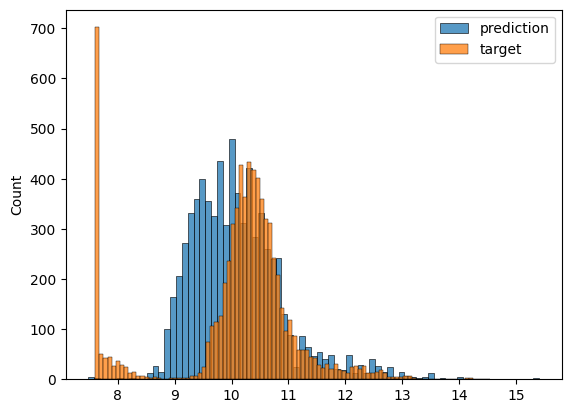

In [29]:
# Plot the predictions
sns.histplot(y_pred,label='prediction')
sns.histplot(y_train,label='target')
plt.legend()

We can see that the predictions look quite different from the actual values, which indicates that our model isn't powerful enough to capture the distribution of the target variable. This is because our model is quite basic and includes only 5 very simple features.

## RMSE: Evaluating Model Quality

RMSE (Root Mean Squared Error) is a metric that quanitifies the quality of the model, and gives an indication of of how large the errors are that our model is making. It is computed using the below formula:

$\Large \text{RMSE} = \sqrt{(1/m) \sum_{i=1}^m(\hat y_i-y_i)^2)}$

- $m$ is the numner of observations
- $\hat y$ is the predicted value of target variable
- $y$ is the actual value of target variable

In [30]:
def rmse(y,y_pred):
    error = y_pred-y
    mse = (error**2).mean()
    return np.sqrt(mse)

In [31]:
print("{:.4f}".format(rmse(y_train,y_pred)))

0.7554


This tells us that on an average, our model's predictions are off by 0.75. This may not be useful in itself, but can be used to compare other models.
>Lower the RMSE score, better the model.

## Validating the model

We have computed RMSE on the **training dataset**, and does not reflect the way the model will be used later, where we will use it to predict the price of cars it hasn't seen before. We will **repeat** the above steps with the **validation** dataset that we had set aside earlier: to do this, we will need to get $X_val$, a matrix computed from the validation dataset.

In [32]:
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [33]:
y_pred = w_0 + X_val.dot(w)

In [34]:
print("{:.4f}".format(rmse(y_val,y_pred)))

0.7617


RMSE while using the validation dataset is $0.76$, and this is the score should use for comparing models

In [35]:
# To avoid duplicate code, we will write the above steps in a function:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Now, our training and validation steps get simplified as shown below:

In [36]:
# Trains the model
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train,y_train)

# Apply the model to validation dataset
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('RMSE score with validation dataset: {:.4f}'.format(rmse(y_val,y_pred)))

RMSE score with validation dataset: 0.7617


## Feature Engineering

To improve our model, we can add more features or create fearures to existing ones: this is called **Feature Engineering**. Our aim is to **improve the RMSE** caluclated on the validation dataset.
First, we will create a new feature, `age`: The dataset is from 2017, and using the `year` column, we can calculate the `age` of the car.


In [37]:
def prepare_X(df):
    # create a copy of the input dataset
    df = df.copy()
    # create a copy of base list with the basic features
    features = base.copy()
    # compute the age feature
    df['age'] = 2017 - df['year']
    features.append('age')
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [38]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
print('RMSE score with validation dataset: {:.4f}'.format(rmse(y_val,y_pred)))

RMSE score with validation dataset: 0.5172


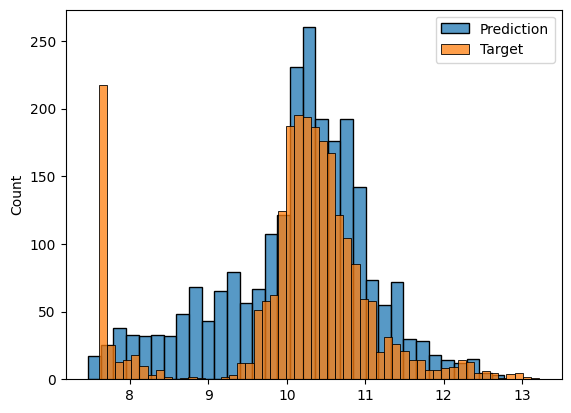

In [39]:
# Let's plot the predictions and actual values to see if there are any improvements
sns.histplot(y_pred,label='Prediction')
sns.histplot(y_val,label='Target')
plt.legend()

We see that our RMSE has improved from 0.76 to 0.517, meanign `age` is a useful feature when making predictions. We also see that the predictions closely follow the distribution  of the target.

### Handling Categorical Variables

Number of doors is a categorical variable. We need to **encode** categorical variables by a set if **binary features**, with a separate feature for each distinct value of the variable.
We will create three binary features: `num_doors_2`, `num_doors_3`, `num_doors_4`. If the car has 2 doors, `num_doors_2` will be set to 1 and rest will be set to 0, and so on. This method of encoding categorical variables is called **One-Hot Encoding**.